In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt 

## Question 1
- No of multiplication needed to multiply a matrix of dimensions (n,k) with a matrix of dimensions (k,m) will be $ {k} \cdot {m} \cdot {n} $
- No of additions needed involved will be $ ({k-1}) \cdot {m} \cdot {n} $

## Question 2
Code for multiplying two matrix using list of list

In [2]:
def matrixMul(A,B):
    n1=len(A)
    n2=len(B)
    ans=[]
    if(n1==0 and n2==0):
        return ans
    if(n1==0 or 2==0):
        raise Exception("one of the given matrix is empty")
    m1=len(A[0])
    m2=len(B[0])
    if(m1!=n2):
        raise Exception("Invalid dimensions")
    
    for i in range(n1):
        row=[]
        for j in range(m2):
            sum=0
            for k in range(m1):
                sum=sum+(A[i][k]*B[k][j])
            row.append(sum)
        ans.append(row)  
    return ans

In [3]:
A=np.random.randint(2,100,(200,200))
B=np.random.randint(2,100,(200,200))
A=A.tolist()
B=B.tolist()

Time comparasions between the both methods, clearly the numpy method will be faster. Numpy stores array in a contigous manner which lowers the access time for fetching the elements because of spatial locality used by cache. While on the other hand python list are not stored in contigous manner and hence increased access time. Also numpy utilizes CPU more efficently by fragmenting task and performing them parrallely. Many of the numpy functions are implemented using relatively fast langauges such as C,C++. Hence numpy matrix multiplication takes less time.

In [4]:
%%timeit -n 10
matrixMul(A,B)

1.5 s ± 67.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
A=np.array(A)
B=np.array(B)

In [6]:
%%timeit -n 10
np.matmul(A,B)

10.1 ms ± 319 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Question 3

Using first method the time complexity that we will would get will be $ O(n^2) $.
As we know that median is the $ (n/2)^{th} $ largest element of array(array size is odd). Thus we need to repeat the process of finding 1st largest, then 2nd largest element and so on for atleast n/2 time. Each iteration takes $O(n)$ time. Doing same for n/2 times would take $(n/2)\cdot O(n)$ time which is equal to $O(n^2)$ time.   

In [7]:
def findMed(lst):
    n=len(lst)
    marked=[]
    
    for i in range(n):
        marked.append(0)

    med1=0
    med2=0
    
    for i in range(int(n/2)):
        ind=-1
        mx=-10000000
        for j in range(n):
            if(marked[j]==0 and lst[j]>mx):
                mx=lst[j]
                
                ind=j
        if(i==int(n/2)-1):
            med1=lst[ind]
        
        marked[ind]=1
    
    mx=-10000000
    ind=-1
    
    for i in range(n):
        if(marked[i]==0 and lst[i]>mx):
                mx=lst[i]
                ind=i
    med2=lst[ind]
    
    if(n%2==1):
        return med2
    else:
        return (med1+med2)/2

lst=[1,2,3,4,5,6,7]
findMed(lst)

4

A better method would be to sort array and then find the median of sorted array. In case of a sorted array the median would be element at $n/2^{th}$ index for odd length arrays and average of element at $(n/2-1)^{th}$ and $(n/2)^{th}$ indices for array of even length. We know that we can sort a array in $O(nlog(n))$ time which is better than $O(n^2)$

In [8]:
def findMed2(lst):
    lst.sort()
    n=len(lst)
    if(n%2==0):
        return ((lst[int(n/2-1)]+lst[int(n/2)])/2)
    else:
        return lst[int(n/2)]
lst=[1,2,3,4,5,6,7,8,9]
findMed2(lst)


5

Time Comparsions between two methods by taking a random array of length 1000 and running it for 70 times.

In [9]:
arr1=np.random.randint(1,1000,(1000,1))

In [11]:
%%timeit -n 10
findMed(arr1)

280 ms ± 3.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
%%timeit -n 10
findMed2(arr1)

6.89 µs ± 2.14 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Question 4

- Gradient with respect to x will be $ \frac{\partial f}{\partial x} = 2xy + y^3cos(x)$
- Gradient with respect to y will be $ \frac{\partial f}{\partial y} = x^2 + 3y^2sin(x)$

## Question 5
Calculating gradient using JAX library

In [13]:
import jax.numpy as jnp
import numpy as np
from jax import grad
def f(x):
  return (x[0]**2)*x[1]+(x[1]**3)*jnp.sin(x[0])

xy=np.array([1.0,2.0])
grd=grad(f)(xy)
print("With respect to x at x=1 and y=2", grd[0])
print("With respect to y at x=1 and y=2",grd[1])

With respect to x at x=1 and y=2 8.322418
With respect to y at x=1 and y=2 11.0976515


## Question 6
Below code with computes gradients with respect to x and y. It gives same answer as calculated manually 

In [14]:
import sympy
from sympy import symbols, diff
x=symbols("x")
y=symbols("y")
eqn=(x**2)*y+y**3*sympy.sin(x)
print("Gradient with respect to x:")
print(diff(eqn,x))
print("Gradient with respect to y:")
print(diff(eqn,y))

Gradient with respect to x:
2*x*y + y**3*cos(x)
Gradient with respect to y:
x**2 + 3*y**2*sin(x)


To confirm that both methods i.e using jax and sympy gives same result that following is results calculated at 10 random points 

In [17]:
gradDF=pd.DataFrame(columns=["values","Using Sympy","Using JAX"])
values=np.random.uniform(1,10,(10,2))
gradDF["values"]=values.tolist()
sympyVal=[]
jaxVal=[]

for i in range(len(values)):
    var=values[i]
    grd=grad(f)(var)
    jaxVal.append([grd[0],grd[1]]);
    sympyVal.append([diff(eqn,x).evalf(subs={x:values[i][0],y:values[i][1]}),diff(eqn,y).evalf(subs={x:values[i][0],y:values[i][1]})]);
gradDF["Using Sympy"]=sympyVal
gradDF["Using JAX"]=jaxVal


In [18]:
gradDF

,values,Using Sympy,Using JAX
0,"[2.5206481461792163, 4.656297242988309]","[-58.6347997096383, 44.1961011880112]","[-58.6348, 44.196095]"
1,"[6.734622556053111, 9.255167373170721]","[838.020464749731, 157.462586856210]","[838.0204, 157.46257]"
2,"[2.9918320700140746, 8.196330389824432]","[-495.420733961431, 39.0210340622670]","[-495.42062, 39.02104]"
3,"[4.517819637363552, 2.7036212783986144]","[20.6080233402828, -1.10423761733725]","[20.608017, -1.1042385]"
4,"[2.4131994333213127, 3.1770025341847106]","[-8.59604425594218, 25.9800863183212]","[-8.596045, 25.980085]"
5,"[8.603804558913568, 7.623886637003111]","[-170.807008687510, 201.631775254995]","[-170.80699, 201.63177]"
6,"[1.3041616948195989, 9.215368819826747]","[230.240390568496, 247.467152666516]","[230.24043, 247.46716]"
7,"[8.432826726966747, 3.130132884907132]","[36.0144651058731, 95.7174639575422]","[36.01446, 95.71747]"
8,"[8.6103599366155, 3.270398434073467]","[32.3131125594312, 97.4756670059402]","[32.31311, 97.47566]"
9,"[3.0454682376229916, 8.591515960956938]","[-578.917435409618, 30.5281369607719]","[-578.91736, 30.528114]"


## Question 7

In [19]:
dict1={
    "2022":{
        "CSE":{
            "1":{
                "RollNo":20110052,
                "Name":"Sandeep",
                "Marks":{
                    "ML":"A",
                    "DBMS":"B",
                    "DSA":"A-"
                }
                
            },
        },
        "EE":{
            "1":{
                "RollNo":20110143,
                "Name":"Rahul",
                "Marks":{
                    "Digital System":"A",
                "Power Systems":"B",
                }
                
            }
        }
    }
}

## Question 8

In [20]:
class Student:
    def __init__(self,Name,RollNo,Marks):
        self.Name=Name
        self.RollNo=RollNo
        self.Marks=Marks
class Branch:
    def __init__(self,Name,Students):
        self.Students=Students
class Mark:
    def __init__(self,Name,Marks):
        self.Name=Name
        self.Marks=Marks
class Year:
    def __init__(self,YearNo,Branchs):
        self.YearNo=YearNo
        self.Branchs=Branchs

In [21]:
m1=Mark("Maths",90)
m2=Mark("English",82)
m3=Mark("Science",78)
m4=Mark("Hindi",88)
m5=Mark("Maths",80)
m6=Mark("English",79)
m7=Mark("Science",56)
m8=Mark("Hindi",67)

s1=Student("Sandeep",20110052,[m1,m2])
s2=Student("Neel",20110000,[m3,m4])
s3=Student("Jay",2011123,[m5,m6])
s4=Student("Dev",2011111,[m7,m8])

In [22]:
b1=Branch("CSE",[s1,s2])
b2=Branch("EE",[s3,s4])

In [23]:
y1=Year("2022",[b1,b2])

## Question 9

### $ y=x^2 $

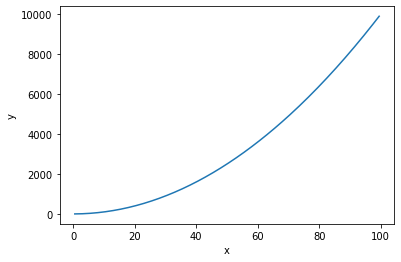

In [24]:
x=np.arange(0.5,100,0.5)
y=x*x
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.show()

### $y=x$

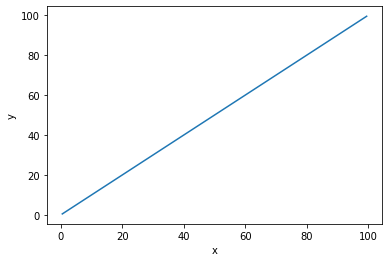

In [25]:
y=x
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.show()

### $y=x^3/100$

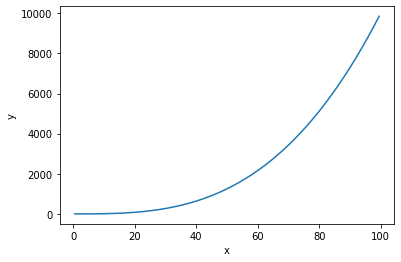

In [26]:
y=np.power(x,3)/100
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.show()

### $y=sin(x)$

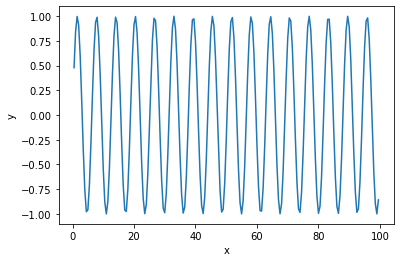

In [27]:
y=np.sin(x)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.show()

### $y=sin(x)/x$

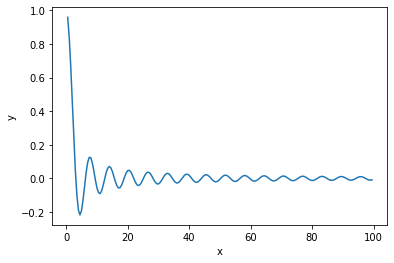

In [28]:
y=np.sin(x)/x
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.show()

### $y=log(x)$

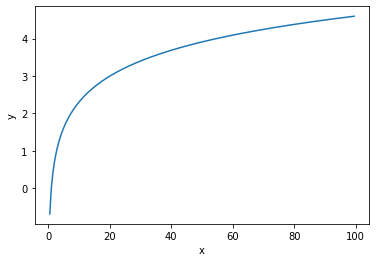

In [29]:
y=np.log(x)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.show()

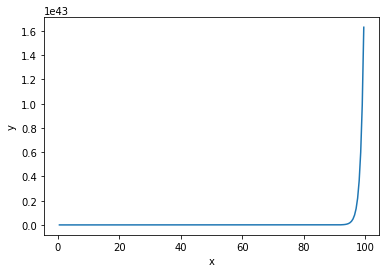

In [30]:
y=np.exp(x)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.show()

## Question 10

In [31]:
randArr=np.random.uniform(1,2,(20,5))
columns=["a","b","c","d","e"]
df=pd.DataFrame(randArr,columns=columns)
print(df)
stds=[]

for e in columns:
    stds.append(df[e].std())

print("Column with hightest standard deviation: ",columns[np.argmax(stds)])
print("Row with lowest mean:",np.argmin(df.mean(axis=1)))

           a         b         c         d         e
0   1.967025  1.312769  1.189172  1.201706  1.480853
1   1.354348  1.928288  1.140816  1.867321  1.039517
2   1.556850  1.906681  1.310637  1.143286  1.105314
3   1.551396  1.028131  1.061084  1.157336  1.258039
4   1.770392  1.857242  1.363614  1.407561  1.825225
5   1.351827  1.490565  1.809443  1.354329  1.830769
6   1.517520  1.538430  1.134551  1.073467  1.942133
7   1.374775  1.601236  1.721529  1.310318  1.362586
8   1.151767  1.631563  1.187630  1.887164  1.958901
9   1.853252  1.161084  1.959313  1.562866  1.477863
10  1.199618  1.011089  1.897310  1.974625  1.594469
11  1.339329  1.055056  1.193191  1.276127  1.704940
12  1.091122  1.358685  1.629762  1.236827  1.787880
13  1.433148  1.932312  1.164448  1.033995  1.800432
14  1.809606  1.657827  1.997041  1.971370  1.688710
15  1.483402  1.853283  1.006576  1.921009  1.511662
16  1.726342  1.399384  1.475379  1.568480  1.110733
17  1.268020  1.333639  1.417355  1.526362  1.

## Question 11

In [32]:
df["f"]=df.sum(axis=1)
df.loc[df["f"] < 8,"g"]="LT8"
df.loc[df["f"]>=8,"g"]="GT8"
print(df)
df1=df.loc[df["g"]=="LT8"]["f"]
df2=df.loc[df["g"]=="GT8"]["f"]
print("No of rows in which the value in column g is LT8 are: ",df1.shape[0])
print("Standard Deviation of column f where value in column g is LT8 is: ",df1.std())
print("Standard Deviation of column f where value in column g is GT8 is: ",df2.std())

           a         b         c         d         e         f    g
0   1.967025  1.312769  1.189172  1.201706  1.480853  7.151524  LT8
1   1.354348  1.928288  1.140816  1.867321  1.039517  7.330290  LT8
2   1.556850  1.906681  1.310637  1.143286  1.105314  7.022769  LT8
3   1.551396  1.028131  1.061084  1.157336  1.258039  6.055987  LT8
4   1.770392  1.857242  1.363614  1.407561  1.825225  8.224034  GT8
5   1.351827  1.490565  1.809443  1.354329  1.830769  7.836932  LT8
6   1.517520  1.538430  1.134551  1.073467  1.942133  7.206101  LT8
7   1.374775  1.601236  1.721529  1.310318  1.362586  7.370444  LT8
8   1.151767  1.631563  1.187630  1.887164  1.958901  7.817025  LT8
9   1.853252  1.161084  1.959313  1.562866  1.477863  8.014378  GT8
10  1.199618  1.011089  1.897310  1.974625  1.594469  7.677111  LT8
11  1.339329  1.055056  1.193191  1.276127  1.704940  6.568644  LT8
12  1.091122  1.358685  1.629762  1.236827  1.787880  7.104276  LT8
13  1.433148  1.932312  1.164448  1.033995  1.80

## Question 12

Broadcasting in numpy is way how arrays are treated while performing arithmeticoperations when their dimensions are not same

For example we have array of of dimensions (3,1) and we try to add scalar to it.
In this case we can imagine as if scalar is streched into array of same dimensions of given array.

In [33]:
arr=np.array([1,2,3])
scalar=3
print(arr+scalar)
arr=np.array([[1,2,3],[4,5,6]])
print(arr+scalar)

[4 5 6]
[[4 5 6]
 [7 8 9]]


Broadcasting also forms when we trying to do some arithmetic operation between different sizes of array, here we are trying to multiply as (2,3) array with (1,3) array. In this case (1,3) will act as if it was streched to (2,3) array. It will be append a row which is copy of itself.

In [36]:
arr1=np.array([1,2,4])
print(arr*arr1)

[[ 1  4 12]
 [ 4 10 24]]


But this will give error if try to multiply (2,3) array with (4,1) array. Because all pair of dimensions should be compitable.
- Here one pair of dimension is (3,1) [columns] which is compatible as one of them is one.
- But second pair of dimension is (2,4) [rows] which is not compatible as there are not same niether one of them is one
Hence the below code will throw error

In [37]:
arr2=np.array([1,2,3,4])
print(arr*arr2)

ValueError: ignored

## Question 13

In [34]:
def argmin(A,axis=0):
    A=np.ravel(A)
    ind=0
    mx=100000000
    for i in range(len(A)):
        if(mx>A[i]):
            ind=i
            mx=A[i]
    return ind
    

To confirm that custom function made gives the same answer as np.argmin we would compare both results by generating a different random array for some number of iterations and verify if they both give same answer.

In [35]:
argMinDF=pd.DataFrame(columns=["Custum Function","np.argmin"])
lst1=[]
lst2=[]
for i in range(10):
    A=np.random.randint(1,100,(10,10,10))
    lst1.append(argmin(A))
    lst2.append(np.argmin(A))
argMinDF["Custum Function"]=lst1
argMinDF["np.argmin"]=lst2
argMinDF

,Custum Function,np.argmin
0,258,258
1,91,91
2,702,702
3,103,103
4,98,98
5,18,18
6,67,67
7,122,122
8,44,44
9,18,18
